# Files

In [16]:
# nro de archivo a crear
nro_de_archivo = 3

# existente
Path_linkedin_empresas = 'linkedin_empresas_mkt_11a50empleados.csv'

In [17]:
df = pd.read_csv(Path_linkedin_empresas)
df = df['Column_Name']
len(df)

265

In [20]:
# buscar un divisor redondo para el df
div_df = int(len(df)/5)
div_df

53

In [21]:
df_1 = df[0:div_df]
df_2 = df[div_df:div_df*2]
df_3 = df[div_df*2:div_df*3]
df_4 = df[div_df*3:div_df*4]
df_5 = df[div_df*4:div_df*5]

dataframes = [df_1, df_2, df_3, df_4, df_5]

print(len(df_1)+len(df_2)+len(df_3)+len(df_4)+len(df_5))

265


# Beautiful soap

# Buscar en google a las personas de cada empresa

In [22]:
import pandas as pd
from bs4 import BeautifulSoup
from lxml.html import fromstring
import urllib.request
import requests
import numpy as np
import time
np.random.seed(15)

In [23]:
def GetFirstLinkedinPersonProfile (soup):
    aux = ''
    for link in soup.find_all('a'):
        if str(link).find("linkedin.com/in/") != -1 and str(link).find("https://") != -1 and str(link).find("google") == -1:
            aux = link.get('href')[link.get('href').find('https://'):link.get('href').find('&sa')]
            print(aux)
            return aux

In [24]:
import requests
from lxml.html import fromstring
def get_proxies():
    url = 'https://free-proxy-list.net/'
    response = requests.get(url)
    parser = fromstring(response.text)
    proxies = set()
    for i in parser.xpath('//tbody/tr')[:10]:
        if i.xpath('.//td[7][contains(text(),"yes")]'):
            #Grabbing IP and corresponding PORT
            proxy = ":".join([i.xpath('.//td[1]/text()')[0], i.xpath('.//td[2]/text()')[0]])
            proxies.add(proxy)
    return cycle(proxies)

In [25]:
import requests
from itertools import cycle
import traceback
def GetPoolProxisFromProxisCsvOrDoGet_proxies ():
    try:
        proxies_df = pd.read_csv('proxies.csv', names = ["proxy"])
        proxy_pool = cycle(proxies_df["proxy"])
        return proxy_pool
    except:
        proxies = get_proxies()
        proxy_pool = cycle(proxies)
        return proxy_pool

In [26]:
def nro_random(multiplicador, piso = 0.01):
    tiempo = 0
    while tiempo < piso:
        tiempo = np.random.random() * multiplicador
    return tiempo 

In [27]:
%%time

df_aux = dataframes[nro_de_archivo-1]
data_1 = []

a = 'https://www.google.com.ar/search?source=hp&ei=7oxuX7uUL_m95OUPmOWfiAg&q=site%3Alinkedin.com%2Fin%2F+AND+%28founder+OR+CEO+OR+fundador%29+AND+%22'
b = '%22&oq=site%3Alinkedin.com%2Fin%2F+AND+%28founder+OR+CEO+OR+fundador%29+AND+%22bakian-growthmarketing%22&gs_lcp=CgZwc3ktYWIQA1DzD1iPE2DkFmgAcAB4AoABAIgBAJIBAJgBBaABAaoBB2d3cy13aXo&sclient=psy-ab&ved=0ahUKEwi7w9nvyYXsAhX5HrkGHZjyB4EQ4dUDCAc&uact=5'
indice = len('https://www.linkedin.com/company/')


#proxy_pool = GetPoolProxisFromProxisCsvOrDoGet_proxies()

#i = 0
#proxy_ok = True
#proxy = next(proxy_pool)

for item in df_aux:
    #
    '''if proxy_ok != True:
        proxy = next(proxy_pool)   
        
    print("Request #%d"%i)'''
    #
    #item = df_aux[i]
    url = a + item[indice:] + b
    
    '''try:
        proxyDict = { 
              "http"  : "http://" + proxy, 
              "https" : "https://" + proxy, 
              "ftp"   : "ftp://" + proxy
            }'''
    #html = requests.get(url, proxies = proxyDict)
    html = requests.get(url)
    '''except:
        proxy_ok = False
        continue'''
    html_doc = str(html.content)
    
    soup = BeautifulSoup(html_doc, 'html.parser')
    
    link = GetFirstLinkedinPersonProfile(soup)
    
    #if link != "None":
    data_1.append(link)

    time.sleep(nro_random(13, 3))
    '''else:
        proxy_ok = False'''
    

https://es.linkedin.com/in/juandellatorre
https://ar.linkedin.com/in/alejandro-olmos-13017a19
https://ar.linkedin.com/in/sebastianmassacane
https://ar.linkedin.com/in/luciano-ranzoni-09a90830
https://ar.linkedin.com/in/bernardoperez
https://ar.linkedin.com/in/alejandro-raizman-7266999
https://ar.linkedin.com/in/qaixa-software
https://ar.linkedin.com/in/matias-perzia-341228116
https://ar.linkedin.com/in/alejandrolopezbarbera
https://www.linkedin.com/in/lengough
https://ar.linkedin.com/in/sebastian-torbidani
https://ar.linkedin.com/in/martinbiegun
https://ar.linkedin.com/in/esteban-torres-g%25C3%25B3mez-omil-285185196
https://es.linkedin.com/in/enriqueveravionnet
https://ch.linkedin.com/in/pablo-dychter-83561380
https://ar.linkedin.com/in/pabloruda
https://ar.linkedin.com/in/martinamaymo
https://ar.linkedin.com/in/fabian-barralon-71aa2b189
https://pe.linkedin.com/in/jonathan-montoya-seron
https://ar.linkedin.com/in/javier-lucio-2b1a249
https://hk.linkedin.com/in/sasa-leung-116a51b5
https

In [28]:
print(len(dataframes[nro_de_archivo-1]), len(data_1))

53 53


In [29]:
data_1

['https://es.linkedin.com/in/juandellatorre',
 'https://ar.linkedin.com/in/alejandro-olmos-13017a19',
 'https://ar.linkedin.com/in/sebastianmassacane',
 'https://ar.linkedin.com/in/luciano-ranzoni-09a90830',
 None,
 'https://ar.linkedin.com/in/bernardoperez',
 'https://ar.linkedin.com/in/alejandro-raizman-7266999',
 'https://ar.linkedin.com/in/qaixa-software',
 'https://ar.linkedin.com/in/matias-perzia-341228116',
 'https://ar.linkedin.com/in/alejandrolopezbarbera',
 None,
 'https://www.linkedin.com/in/lengough',
 'https://ar.linkedin.com/in/sebastian-torbidani',
 'https://ar.linkedin.com/in/martinbiegun',
 'https://ar.linkedin.com/in/esteban-torres-g%25C3%25B3mez-omil-285185196',
 'https://es.linkedin.com/in/enriqueveravionnet',
 'https://ch.linkedin.com/in/pablo-dychter-83561380',
 'https://ar.linkedin.com/in/pabloruda',
 None,
 'https://ar.linkedin.com/in/martinamaymo',
 'https://ar.linkedin.com/in/fabian-barralon-71aa2b189',
 'https://pe.linkedin.com/in/jonathan-montoya-seron',
 'h

In [30]:
dataframe = pd.DataFrame(data_1, columns = ["link_contacto"])
dataframe["link_empresa"] = dataframes[nro_de_archivo-1].reset_index(drop=True)
dataframe.head(3)

,link_contacto,link_empresa
0,https://es.linkedin.com/in/juandellatorre,https://www.linkedin.com/company/tomilli
1,https://ar.linkedin.com/in/alejandro-olmos-130...,https://www.linkedin.com/company/the-wizard-ag...
2,https://ar.linkedin.com/in/sebastianmassacane,https://www.linkedin.com/company/mobilenik


In [31]:
dataframe.to_csv("data_N_ok/data_"+str(nro_de_archivo) +".csv")

# Notas de Beautifulsoap - No ejecutar

In [170]:
data.to_csv(r'BuscarGoogleParseHub.csv', index = False)

In [187]:
from bs4 import BeautifulSoup
import requests
l={}
u=list()
country_code = 'ar'
url="https://www.proxynova.com/proxy-server-list/country-"+country_code+"/"
respo = requests.get(url).text
soup = BeautifulSoup(respo,'html.parser')
allproxy = soup.find_all("tr")
for proxy in allproxy:
    foo = proxy.find_all("td")
    try: 
        l["ip"]=foo[0].text.replace("\n","").replace("document.write(","").replace(")","").replace("\'","").replace(";","")
    except:
        l["ip"]=None
    try:
        l["port"]=foo[1].text.replace("\n","").replace(" ","")
    except:
        l["port"]=None
    try:
        l["country"]=foo[5].text.replace("\n","").replace(" ","")
    except:
        l["country"]=None
    if(l["port"] is not None):
        u.append(l)

    l={}
    print(u)

[]
[{'ip': '', 'port': '999', 'country': 'Argentina-PresidenciaRoqueSáenzPeña'}]
[{'ip': '', 'port': '999', 'country': 'Argentina-PresidenciaRoqueSáenzPeña'}, {'ip': '', 'port': '8080', 'country': 'Argentina-BuenosAires'}]
[{'ip': '', 'port': '999', 'country': 'Argentina-PresidenciaRoqueSáenzPeña'}, {'ip': '', 'port': '8080', 'country': 'Argentina-BuenosAires'}, {'ip': '', 'port': '8080', 'country': 'Argentina-MardelPlata'}]
[{'ip': '', 'port': '999', 'country': 'Argentina-PresidenciaRoqueSáenzPeña'}, {'ip': '', 'port': '8080', 'country': 'Argentina-BuenosAires'}, {'ip': '', 'port': '8080', 'country': 'Argentina-MardelPlata'}, {'ip': '', 'port': '3128', 'country': 'Argentina-Laborde'}]
[{'ip': '', 'port': '999', 'country': 'Argentina-PresidenciaRoqueSáenzPeña'}, {'ip': '', 'port': '8080', 'country': 'Argentina-BuenosAires'}, {'ip': '', 'port': '8080', 'country': 'Argentina-MardelPlata'}, {'ip': '', 'port': '3128', 'country': 'Argentina-Laborde'}, {'ip': '', 'port': '3128', 'country': '

In [218]:
import urllib.request
from urllib.error import URLError, HTTPError, ContentTooShortError
def download(url, num_retries=2):
    print('Downloading:', url)
    try:
        html = urllib.request.urlopen(url).read()
    except (URLError, HTTPError, ContentTooShortError) as e:
        print('Download error:', e.reason)
        html = None
        if num_retries > 0:
            if hasattr(e, 'code') and 500 <= e.code < 600:
            # recursively retry 5xx HTTP errors
                return download(url, num_retries - 1)
    return html

In [199]:
url = 'https://www.notion.so/Rinc-n-Matem-tico-bff29784b1a241d99d835e732bed98d4'
download(url)

b'<!DOCTYPE html><html lang="en" class="notion-html"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width,height=device-height,initial-scale=1,maximum-scale=1,user-scalable=no,viewport-fit=cover"><title>Notion \xe2\x80\x93 The all-in-one workspace for your notes, tasks, wikis, and databases.</title><meta name="description" content="A new tool that blends your everyday work apps into one. It\'s the all-in-one workspace for you and your team"><script type="text/javascript">window.__webStartTime=Date.now()</script><meta name="twitter:card" content="summary_large_image"><meta name="twitter:site" content="@NotionHQ"><meta name="twitter:title" content="Notion \xe2\x80\x93 The all-in-one workspace for your notes, tasks, wikis, and databases."><meta name="twitter:description" content="A new tool that blends your everyday work apps into one. It\'s the all-in-one workspace for you and your team"><meta name="twitter:url" content="https://www.notion.so"><meta name="twitter

In [224]:
url = 'https://www.google.com/search?client=firefox-b-d&sxsrf=ALeKk00zH1RBISh3x1xLcWnZ59rOvZGSLQ%3A1601111643747&ei=WwZvX5aaLYC05OUP1pKLyAo&q=sgbsdg+and+%22hh%22&oq=sgbsdg+and+%22hh%22&gs_lcp=CgZwc3ktYWIQAzIHCCEQChCgATIHCCEQChCgAToHCAAQsAMQDToJCAAQsAMQDRAeOgsIABCwAxANEAUQHjoECAAQEzoICAAQDRAeEBM6CggAEA0QBRAeEBNQlhhY5zNghTZoAXAAeACAAewCiAHRCpIBBzMuMy4wLjKYAQCgAQGqAQdnd3Mtd2l6yAEKwAEB&sclient=psy-ab&ved=0ahUKEwjWs5XWvYbsAhUAGrkGHVbJAqkQ4dUDCAw&uact=5'
url = 'https://www.google.com/search?q=hola'
download(url)

Downloading: https://www.google.com/search?q=hola
Download error: Forbidden


In [221]:
from bs4 import BeautifulSoup
url = 'http://example.webscraping.com/places/default/view/Andorra-6'
html = download(url)
soup = BeautifulSoup(html)
# locate the area row
tr = soup.find(attrs={'id':'places_area__row'})
td = tr.find(attrs={'class':'w2p_fw'}) # locate the data element
area = td.text # extract the text from the data element
print(area)

Downloading: http://example.webscraping.com/places/default/view/Andorra-6
468 square kilometres


In [ ]:
from bs4 import BeautifulSoup
url = 'http://example.webscraping.com/places/default/view/Andorra-6'
html = download(url)
soup = BeautifulSoup(html)

'b\'<!doctype html><html lang="es-419"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>sgbsdg and "hh" - Buscar con Google</title><script nonce="CkbG4gmFEX29MBgh4lmtEQ==">(function(){\\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){\\nvar a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=
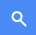

In [249]:
from lxml.html import fromstring
import requests
url = 'https://www.google.com/search?client=firefox-b-d&sxsrf=ALeKk00zH1RBISh3x1xLcWnZ59rOvZGSLQ%3A1601111643747&ei=WwZvX5aaLYC05OUP1pKLyAo&q=sgbsdg+and+%22hh%22&oq=sgbsdg+and+%22hh%22&gs_lcp=CgZwc3ktYWIQAzIHCCEQChCgATIHCCEQChCgAToHCAAQsAMQDToJCAAQsAMQDRAeOgsIABCwAxANEAUQHjoECAAQEzoICAAQDRAeEBM6CggAEA0QBRAeEBNQlhhY5zNghTZoAXAAeACAAewCiAHRCpIBBzMuMy4wLjKYAQCgAQGqAQdnd3Mtd2l6yAEKwAEB&sclient=psy-ab&ved=0ahUKEwjWs5XWvYbsAhUAGrkGHVbJAqkQ4dUDCAw&uact=5'

html = requests.get(url)
tree = fromstring(html.content)
results = tree.cssselect('p.pv-entity__secondary-title t-14 t-black t-normal')
results
type(str(html.content))
str(html.content)